# Métodos de Muestreo

## Población, Muestra y Muestreo

En el análisis estadístico de datos, generalmente utilizamos datos de algunas muestras seleccionadas para obtener conclusiones sobre la población de la cual se tomaron esas muestras. Un diseño de estudio correcto debería garantizar que los datos de la muestra sean representativos de la población de la cual se extrajeron las muestras. Dado que los parámetros que caracterizan la población son desconocidos, debemos utilizar muestras para obtener estimaciones de esos parámetros, [1].

![](imagen1.jpg)

En este capítulo empezamos trabajando con el verdadero núcleo de la estadística inferencial, en tanto que usamos datos muestrales para hacer inferencias acerca de las poblaciones. Las dos aplicaciones principales de la estadística inferencial implican el uso de datos muestrales para 1. estimar el valor de un parámetro de la población, y 2. probar alguna aseveración (o hipótesis) acerca de una población, [1].

- La población incluye todos los elementos de un conjunto de datos.
- La muestra consta de una o más observaciones de la población.

Más de una muestra se puede tomar de la misma población. Al estimar un parámetro de una población, como por ejemplo, el valor esperado del peso de los hombres europeos, típicamente no podemos medir a todos los sujetos. Debemos limitarnos a investigar una muestra (preferiblemente representativa) tomada de este grupo. Con base en la estadística de la muestra, es decir, el valor correspondiente calculado a partir de los datos de la muestra, utilizamos la inferencia estadística para extraer conclusiones acerca del parámetro correspondiente en la población, [1].


**Distribución de muestreo (empírica):** La distribución de probabilidad de un estadístico dado, basada en una muestra aleatoria.

**Inferencia estadística:** Permite realizar una suposición fundamentada acerca de un parámetro poblacional basado en un estadístico calculado a partir de una muestra representativa de esa población.

Se proporcionan ejemplos de parámetros y estadísticos en la Tabla 1. Frecuentemente, los parámetros poblacionales se indican utilizando letras griegas, mientras que los estadísticos de muestra suelen utilizar letras estándar, [2].

|            | Muestra estadística | Parámetro de la población |
|------------|------------|------------|
| Media   | $\overline{x}$  | $\mu$   |
| Desviación estándar   | sd   | $\sigma$   |

**Población:** La población es el conjunto completo de elementos que tienen una característica común. En Python, podemos representar una población como una lista o array.

In [40]:
poblacion = [145, 145, 137, 140, 152, 160, 171, 163, 149, 150]
print('Población: ', poblacion)

Población:  [145, 145, 137, 140, 152, 160, 171, 163, 149, 150]


**Muestra:** La muestra es un subconjunto representativo de la población. De una población se puede extraer un sinnúmero de muestras. La cantidad de posibles muestras se conoce como espacio muestral, [2].

Utilizaremos la librería random para seleccionar una muestra aleatoria.

In [41]:
import random

tamano_muestra = 3
muestra = random.sample(poblacion, tamano_muestra)
print("Muestra: ", muestra)


Muestra:  [150, 149, 140]


**Muestreo:**
El proceso de seleccionar una muestra de la población. Aquí se utiliza el método aleatorio simple para seleccionar una muestra, [2].

In [42]:
def muestreo_aleatorio_simple(poblacion, tamano_muestra):
    return random.sample(poblacion, tamano_muestra)

muestra = muestreo_aleatorio_simple(poblacion, tamano_muestra)
print("Muestra con método aleatorio simple: ", muestra)


Muestra con método aleatorio simple:  [152, 171, 160]


Para que las inferencias y conclusiones que se hacen sobre la población sean válidas, la muestra analizada debe cumplir con ser representativa. Para conseguir representatividad en una muestra, es necesario emplear una adecuada técnica de muestreo.

Una muestra representativa es esencial para que los resultados obtenidos de la muestra puedan generalizarse de manera confiable a la población completa. Aquí hay un ejemplo de cómo se puede obtener una muestra representativa utilizando estratificación.

## Estratificación:
La estratificación implica dividir la población en grupos más pequeños llamados estratos y luego tomar una muestra de cada estrato proporcional al tamaño del estrato en la población completa, [1], [2].


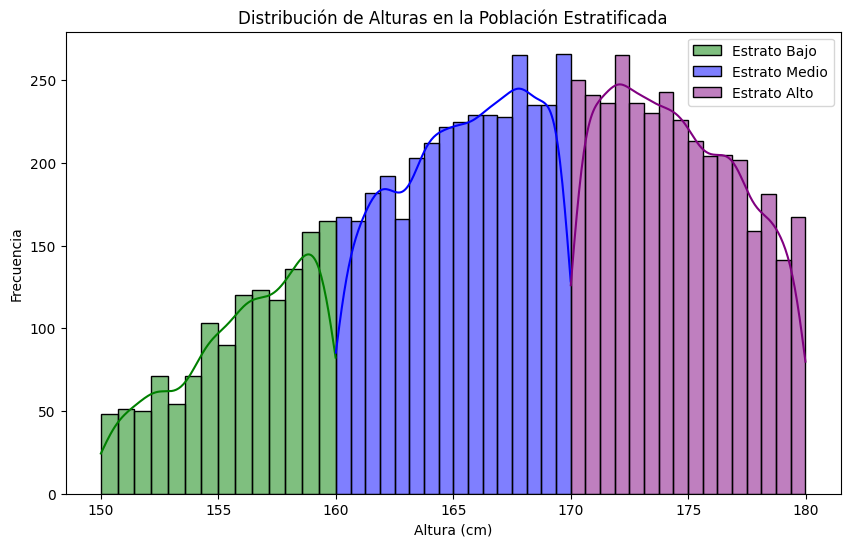

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import norm

# Definir parámetros de la población
media_poblacion = 170  # en centímetros
desviacion_poblacion = 10

# Generar población de alturas de estudiantes
np.random.seed(42)
poblacion = np.random.normal(media_poblacion, desviacion_poblacion, 10000)

# Crear estratos basados en rangos de alturas
estrato_bajo = poblacion[(poblacion >= 150) & (poblacion < 160)]
estrato_medio = poblacion[(poblacion >= 160) & (poblacion < 170)]
estrato_alto = poblacion[(poblacion >= 170) & (poblacion < 180)]

# Determinar tamaños relativos de los estratos
tamano_estrato_bajo = len(estrato_bajo)
tamano_estrato_medio = len(estrato_medio)
tamano_estrato_alto = len(estrato_alto)

# Proporciones relativas
proporcion_estrato_bajo = tamano_estrato_bajo / len(poblacion)
proporcion_estrato_medio = tamano_estrato_medio / len(poblacion)
proporcion_estrato_alto = tamano_estrato_alto / len(poblacion)

# Mostrar la distribución de la población estratificada
plt.figure(figsize=(10, 6))
sns.histplot(estrato_bajo, kde=True, color='green', label='Estrato Bajo')
sns.histplot(estrato_medio, kde=True, color='blue', label='Estrato Medio')
sns.histplot(estrato_alto, kde=True, color='purple', label='Estrato Alto')
plt.title('Distribución de Alturas en la Población Estratificada')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Después de la estratificación, se puede tomar una muestra aleatoria simple de cada estrato. Esto garantizará que cada grupo esté representado adecuadamente en la muestra.

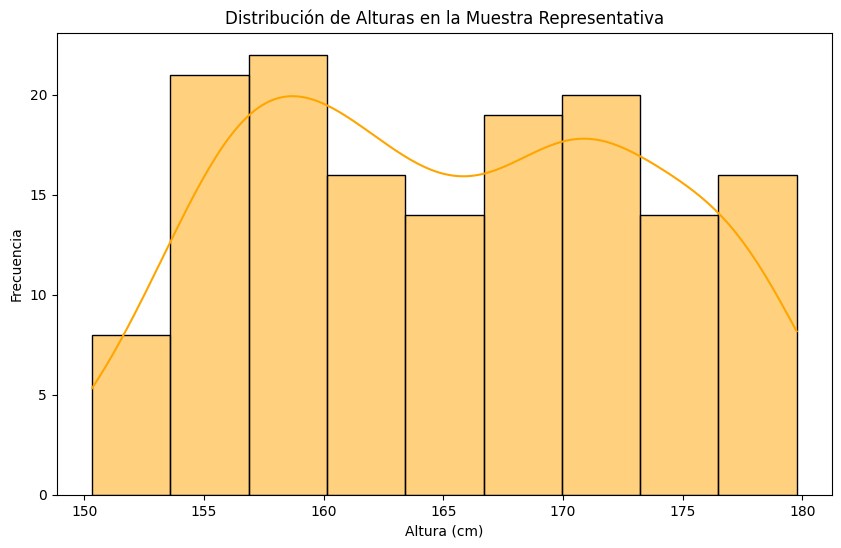

In [44]:
tamano_muestra_estrato = 50  # ajusta según tus necesidades

# Tomar una muestra aleatoria de cada estrato
muestra_estrato_bajo = random.sample(list(estrato_bajo), tamano_muestra_estrato)
muestra_estrato_medio = random.sample(list(estrato_medio), tamano_muestra_estrato)
muestra_estrato_alto = random.sample(list(estrato_alto), tamano_muestra_estrato)

# Combinar las muestras de los estratos
muestra_representativa = muestra_estrato_bajo + muestra_estrato_medio + muestra_estrato_alto

# Mostrar la distribución de la muestra representativa
plt.figure(figsize=(10, 6))
sns.histplot(muestra_representativa, kde=True, color='orange')
plt.title('Distribución de Alturas en la Muestra Representativa')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()


Este enfoque asegura que cada estrato esté representado en la muestra, lo que es crucial para obtener resultados más generalizables a toda la población.

## Estadísticos y parámetros

**Estadístico:** Valor numérico que representa una propiedad de una muestra aleatoria, [2]. Ejemplos de estadísticos son:

- la media de los datos de la muestra.
- el rango de los datos de la muestra.
- la desviación de los datos respecto a la media de la muestra.

In [45]:
import statistics

media_muestra = statistics.mean(muestra)
mediana_muestra = statistics.median(muestra)
desviacion_estandar_muestra = statistics.stdev(muestra)

print("Media de la muestra:", media_muestra)
print("Mediana de la muestra:", mediana_muestra)
print("Desviación estándar de la muestra:", desviacion_estandar_muestra)


Media de la muestra: 161
Mediana de la muestra: 160
Desviación estándar de la muestra: 9.539392014169456


**Parámetro:** Característica de una distribución que describe a una población, como la media o la desviación estándar de una distribución normal. A menudo se denota utilizando letras griegas, [2].

In [46]:
media_poblacion = statistics.mean(poblacion)
mediana_poblacion = statistics.median(poblacion)
desviacion_estandar_poblacion = statistics.stdev(poblacion)

print("Media de la población:", media_poblacion)
print("Mediana de la población:", mediana_poblacion)
print("Desviación estándar de la población:", desviacion_estandar_poblacion)


Media de la población: 169.97864016631573
Mediana de la población: 169.97405024207123
Desviación estándar de la población: 10.034623805034034


### Ejemplo: 
Generaremos una población que representa la altura de todos los estudiantes de la universidad. Luego, tomaremos una muestra aleatoria de esa población, calcularemos estadísticos de la muestra y compararemos con los parámetros de la población. Finalmente, dibujaremos la distribución de la muestra.

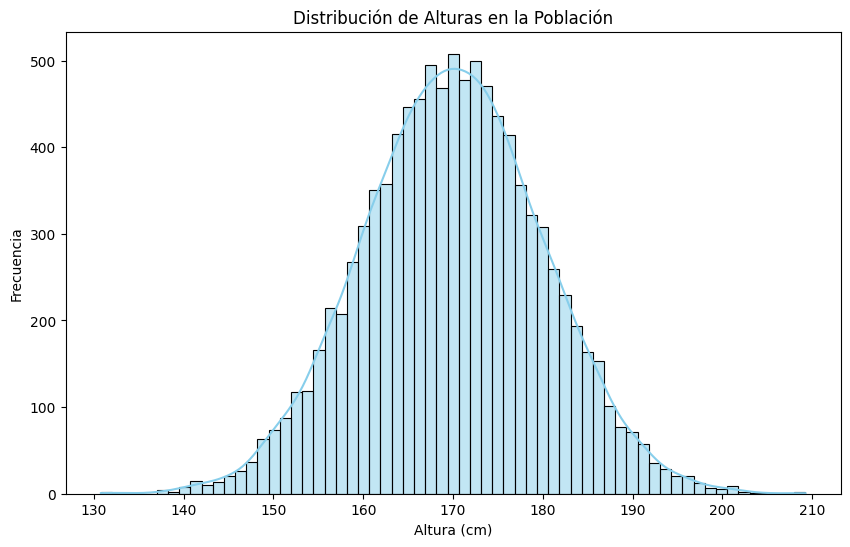

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import norm

# Definir parámetros de la población
media_poblacion = 170  # en centímetros
desviacion_poblacion = 10

# Generar población de alturas de estudiantes
np.random.seed(42)
poblacion = np.random.normal(media_poblacion, desviacion_poblacion, 10000)

# Mostrar la distribución de la población
plt.figure(figsize=(10, 6))
sns.histplot(poblacion, kde=True, color='skyblue')
plt.title('Distribución de Alturas en la Población')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()


Ahora, tomaremos una muestra aleatoria simple de esta población:

In [48]:
tamano_muestra = 100
muestra = random.sample(list(poblacion), tamano_muestra)

# Calcular estadísticos de la muestra
media_muestra = np.mean(muestra)
desviacion_muestra = np.std(muestra)

print(f'Media de la muestra: {media_muestra:.2f} cm')
print(f'Desviación estándar de la muestra: {desviacion_muestra:.2f} cm')

Media de la muestra: 168.58 cm
Desviación estándar de la muestra: 10.50 cm


## Muestreo Aleatorio Simple (MAS)

El Muestreo Aleatorio Simple (MAS) es un método de selección de muestra que garantiza que cada elemento de la población tenga igual probabilidad de ser elegido. Este enfoque directo y fácil de entender se basa en la premisa de que, en una muestra aleatoria, los miembros de una población se seleccionan de manera que cada individuo tenga la misma posibilidad de ser seleccionado, [1]. 

En una muestra aleatoria simple de tamaño nn, la elección se realiza de tal manera que cada posible muestra del mismo tamaño nn tenga exactamente la misma probabilidad de ser seleccionada. Este método asegura la representatividad de la muestra y es fundamental para la inferencia estadística, ya que cada elemento de la población tiene la misma oportunidad de contribuir a la información recopilada.

**Ejemplo:**
Imagine un salón de clases con 60 estudiantes acomodados en seis filas de 10 estudiantes cada una. Suponga que el profesor selecciona una muestra de 10 estudiantes tirando un dado y seleccionando la fila correspondiente al resultado. ¿El resultado es una muestra aleatoria? ¿Es una muestra aleatoria simple?

**Solución:**
La muestra es una muestra aleatoria porque cada estudiante tiene la misma posibilidad (una posibilidad en seis) de ser elegido. Sin embargo, la muestra no es una muestra aleatoria simple porque no todas las muestras de tamaño 10 tienen la misma posibilidad de ser escogidas. Por ejemplo, este diseño muestral de usar un dado para seleccionar una fila hace imposible seleccionar 10 estudiantes que estén en filas diferentes (aunque hay una posibilidad en seis de seleccionar la muestra que consiste en los 10 estudiantes en la primera
fila).

Con el muestreo aleatorio se espera que todos los componentes de la población estén (aproximadamente) representados de manera proporcional. Las muestras aleatorias se seleccionan mediante diversos métodos, incluyendo el uso de computadoras para generar números aleatorios.

**Código en Python:**
Para realizar un muestreo aleatorio simple en Python, se puede utilizar la función random.sample de la biblioteca estándar de Python

In [1]:
import random

# Definir la información del salón de clases
num_filas = 6
estudiantes_por_fila = 10
total_estudiantes = num_filas * estudiantes_por_fila

# Crear una lista de todos los estudiantes en el salón
todos_los_estudiantes = [f'Estudiante {i+1}' for i in range(total_estudiantes)]

# Realizar muestreo aleatorio simple
tamanio_muestra = 10  # Puedes ajustar el tamaño de la muestra según tus necesidades
muestra_aleatoria = random.sample(todos_los_estudiantes, tamanio_muestra)

# Imprimir la muestra aleatoria
print("Muestra aleatoria:")
for estudiante in muestra_aleatoria:
    print(estudiante)



Muestra aleatoria:
Estudiante 31
Estudiante 46
Estudiante 37
Estudiante 7
Estudiante 12
Estudiante 18
Estudiante 20
Estudiante 47
Estudiante 8
Estudiante 26


## Muestreo Aleatorio Estratificado (MAE)

El Muestreo Aleatorio Estratificado es una técnica que se utiliza para obtener una muestra representativa de una población al dividirla en subgrupos homogéneos llamados estratos. La idea fundamental es asegurar que cada estrato esté adecuadamente representado en la muestra final, permitiendo así una evaluación más precisa de las características de la población en su conjunto, [1].

En primer lugar, se realiza una clasificación de la población en diferentes estratos o subgrupos basados en características compartidas, como el género, la edad u otras variables relevantes. Estos estratos deben ser mutuamente excluyentes y exhaustivos, es decir, cada individuo debe pertenecer a un solo estrato y todos los individuos deben pertenecer a algún estrato.

Posteriormente, se realiza un muestreo aleatorio simple dentro de cada estrato, seleccionando aleatoriamente individuos de cada subgrupo como se muestra en la Figura 2. Este enfoque permite asegurar que todos los estratos estén representados en la muestra final, independientemente de su tamaño relativo en la población general. Al obtener datos de cada estrato, se garantiza una representación equitativa de las diversas características presentes en la población.

![](imagen2.png)

El Muestreo Aleatorio Estratificado es particularmente útil cuando se identifican diferencias significativas entre subgrupos de la población y se busca capturar esas variaciones en la muestra final. Al considerar la homogeneidad dentro de los estratos, se mejora la precisión de las estimaciones y se evita el riesgo de subrepresentación de ciertos grupos, lo que podría ocurrir en un muestreo aleatorio simple sin estratificación. Este enfoque estratificado es una herramienta valiosa en la investigación y la estadística para obtener muestras representativas y generalizables de poblaciones heterogéneas.

**Ejemplo:**
Supongamos que deseamos realizar un estudio sobre el rendimiento académico de estudiantes en una escuela, y tenemos información sobre el rendimiento de los estudiantes divididos por género (masculino y femenino). Vamos a utilizar el Muestreo Aleatorio Estratificado para asegurarnos de obtener una muestra representativa de ambos géneros. Aquí tienes un ejemplo de cómo podrías hacerlo en Python:

In [3]:
import random

# Datos de ejemplo: rendimiento académico de los estudiantes divididos por género
estudiantes_masculinos = ["EstudianteM" + str(i) for i in range(1, 51)]
estudiantes_femeninos = ["EstudianteF" + str(i) for i in range(1, 51)]

# Definir la población estratificada
poblacion_estratificada = {
    "Masculino": estudiantes_masculinos,
    "Femenino": estudiantes_femeninos
}

# Especificar el tamaño de la muestra deseada
tamano_muestra = 10

# Realizar muestreo aleatorio estratificado
muestra_estratificada = []

for genero, estudiantes in poblacion_estratificada.items():
    tamano_estrato = int(tamano_muestra * len(estudiantes) / len(estudiantes_masculinos + estudiantes_femeninos))
    muestra_estratificada.extend(random.sample(estudiantes, tamano_estrato))

# Imprimir la muestra estratificada
print("Muestra Aleatoria Estratificada:")
for estudiante in muestra_estratificada:
    print(estudiante)


Muestra Aleatoria Estratificada:
EstudianteM44
EstudianteM49
EstudianteM38
EstudianteM12
EstudianteM47
EstudianteF40
EstudianteF5
EstudianteF35
EstudianteF46
EstudianteF48


## Resumen

**Población:** Conjunto completo de elementos que comparten una característica común y son objeto de estudio.

**Muestra:** Subconjunto representativo de la población, utilizado para realizar inferencias sobre esta.

**Muestreo:** Proceso de seleccionar una muestra de una población para realizar análisis estadísticos.

**Estadísticos:** Medidas numéricas calculadas a partir de los datos de una muestra, proporcionan información sobre las características de la muestra.

**Parámetros:** Medidas numéricas calculadas a partir de los datos de toda la población, proporcionan información completa sobre la población.

**Muestreo Aleatorio Simple:** Método de selección de muestra en el que cada elemento de la población tiene la misma probabilidad de ser elegido.

**Muestreo Aleatorio Estratificado:** Divide la población en subgrupos homogéneos llamados estratos. Luego, se realiza un Muestreo Aleatorio Simple dentro de cada estrato.Asegura una representación adecuada de cada subgrupo en la muestra final, útil cuando la población presenta heterogeneidad interna.

## Referencias

[1] M. F. Triola, Estadistica. Prentice Hall, 2012.

[2] T. Haslwanter, An Introduction to Statistics with Python: With Applications in the Life Sciences. Springer, 2016.
